| Columna       | Tipo de Variable          | Descripción Breve |
|---------------|---------------------------|-------------------|
| `age`         | Numérica entera           | Edad de la persona en años. |
| `weight`      | Numérica entera           | Peso de la persona en kilogramos. |
| `height`      | Numérica entera           | Altura de la persona en centímetros. |
| `exercise`    | Categórica ordinal        | Nivel de ejercicio físico (none, low, medium, high). |
| `sleep`       | Numérica continua         | Horas promedio de sueño diario. |
| `sugar_intake`| Categórica ordinal        | Nivel de consumo de azúcar (low, medium, high). |
| `smoking`     | Categórica binaria        | Indicador de si la persona fuma (yes, no). |
| `alcohol`     | Categórica binaria        | Indicador de si la persona consume alcohol (yes, no). |
| `married`     | Categórica binaria        | Indicador de si la persona está casada (yes, no). |
| `profession`  | Categórica nominal        | Ocupación de la persona (ej. office_worker, teacher, artist). |
| `bmi`         | Numérica continua         | Índice de masa corporal calculado. |
| `health_risk` | Categórica binaria        | Nivel de riesgo para la salud (low, high). |

In [57]:
from pathlib import Path
import pandas as pd

# Asumiendo que ejecutas el notebook desde la raíz o desde la carpeta notebooks
base_path = Path("..") if Path().cwd().name == "notebooks" else Path(".")
datos_path = base_path / "datos" / "Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv"

df = pd.read_csv(datos_path)

In [58]:
# Numero de filas y columnas
print("Numero de filas : " , df.shape[0])
print("Numero de columnas : " , df.shape[1])
# Celdas vacias
print('Celdas vacias' , df.isnull().sum())

Numero de filas :  5000
Numero de columnas :  12
Celdas vacias age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64


In [59]:
# Resumen de las columnas + datos unicos por columna

print(f"{str("-----"*9):^50}")
print(f"|{"Columna":^25} | {"Tipo":^10} | {"Unicos":^5}| ")
print(f"{str("-----"*9):^50}")
for name_col in df:
    print(f"|{name_col:<25} | {str(df[name_col].dtype):<10} | {str(df[name_col].nunique()):<5} |")
print(f"{str("-----"*9):^50}")



  ---------------------------------------------   
|         Columna          |    Tipo    | Unicos| 
  ---------------------------------------------   
|age                       | int64      | 62    |
|weight                    | int64      | 65    |
|height                    | int64      | 55    |
|exercise                  | object     | 4     |
|sleep                     | float64    | 71    |
|sugar_intake              | object     | 3     |
|smoking                   | object     | 2     |
|alcohol                   | object     | 2     |
|married                   | object     | 2     |
|profession                | object     | 8     |
|bmi                       | float64    | 383   |
|health_risk               | object     | 2     |
  ---------------------------------------------   


In [60]:
# Convertir en categoricas las columnas que tienen pocos valores unicos
columnas_a_categoricas = ['exercise','sugar_intake','smoking', 'alcohol','married','profession','health_risk']
for col in columnas_a_categoricas:
    df[col] = df[col].astype('category')

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   int64   
 1   weight        5000 non-null   int64   
 2   height        5000 non-null   int64   
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   category
 7   alcohol       5000 non-null   category
 8   married       5000 non-null   category
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   category
dtypes: category(7), float64(2), int64(3)
memory usage: 230.8 KB


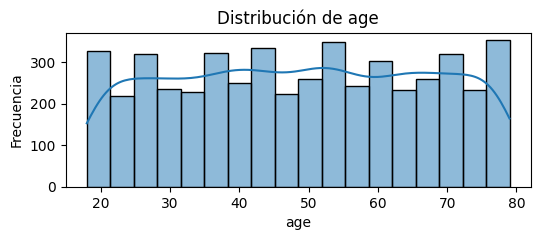

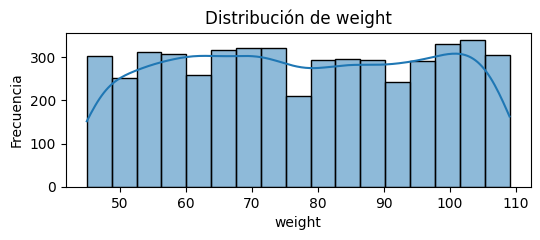

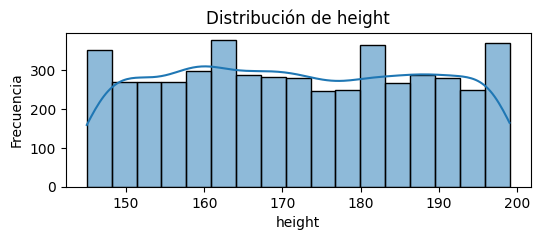

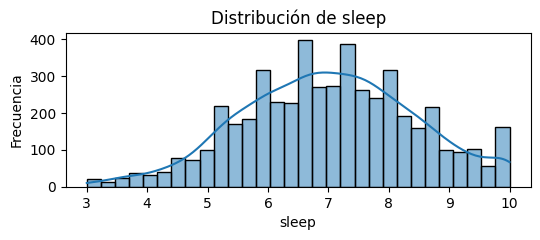

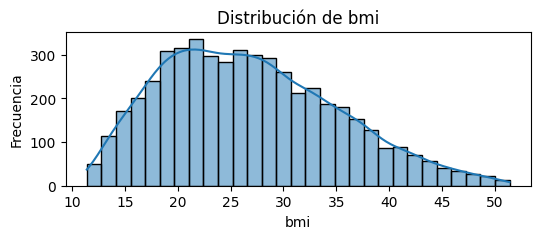

In [62]:
# Graficas de distribucion para variables numericas
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

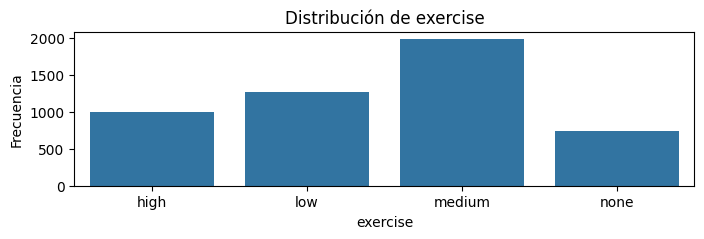

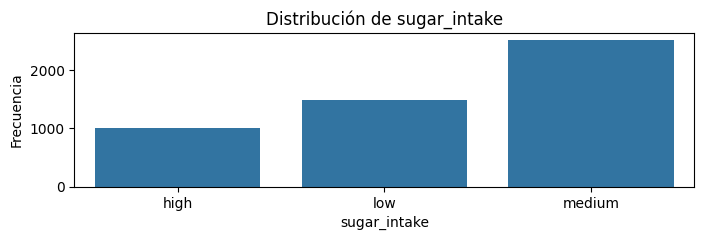

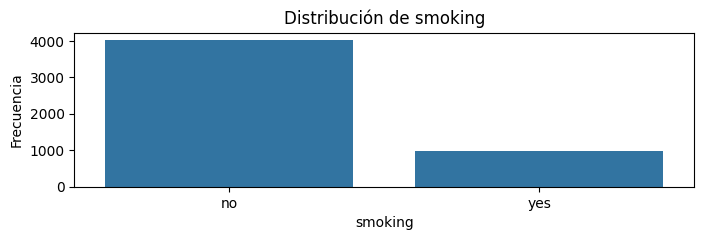

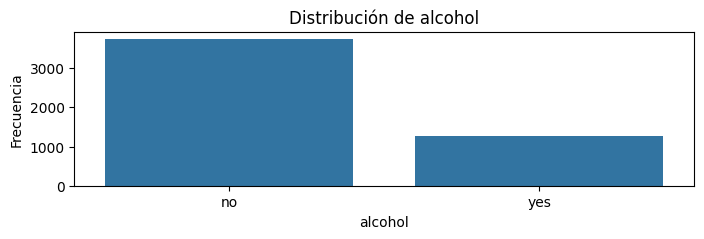

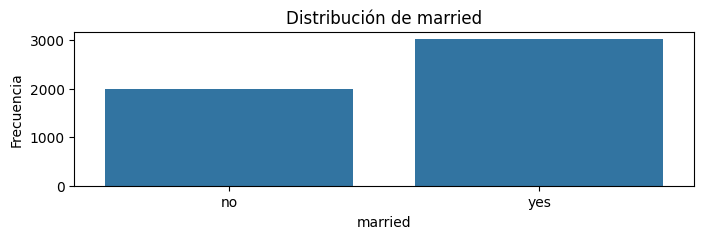

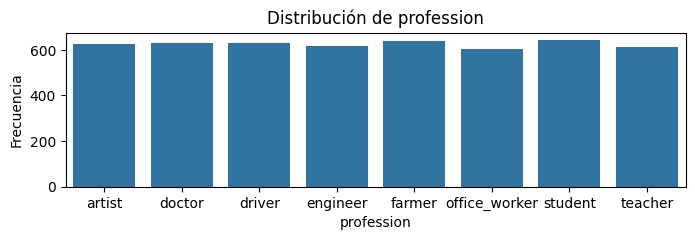

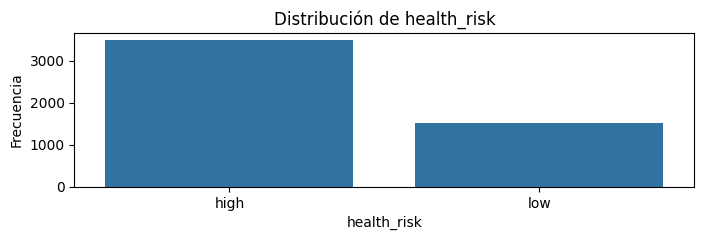

In [63]:
# Graficas de distribucion para variables categoricas

categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 2))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

## ANALISIS
- Se ve que las columnas que tienen dos variables se puede transformar en binarias y poder hacer una mejor exploracion.
- la variable objetivo es health_risk

In [64]:
# convertir en binarias las columnas que tienen dos valores unicos
columnas_a_binarias = ['smoking', 'alcohol', 'married', 'health_risk']
for col in columnas_a_binarias:
    df[col] = df[col].cat.codes


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   int64   
 1   weight        5000 non-null   int64   
 2   height        5000 non-null   int64   
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   int8    
 7   alcohol       5000 non-null   int8    
 8   married       5000 non-null   int8    
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   int8    
dtypes: category(3), float64(2), int64(3), int8(4)
memory usage: 230.3 KB


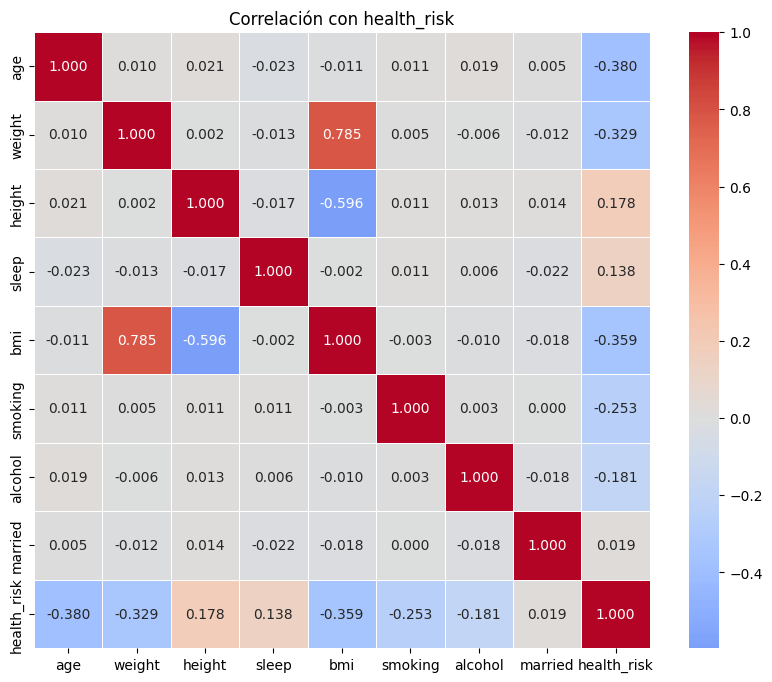


--- EXERCISE vs health_risk ---
health_risk      0      1
exercise                 
high         0.609  0.391
low          0.837  0.163
medium       0.606  0.394
none         0.826  0.174


<Figure size 800x400 with 0 Axes>

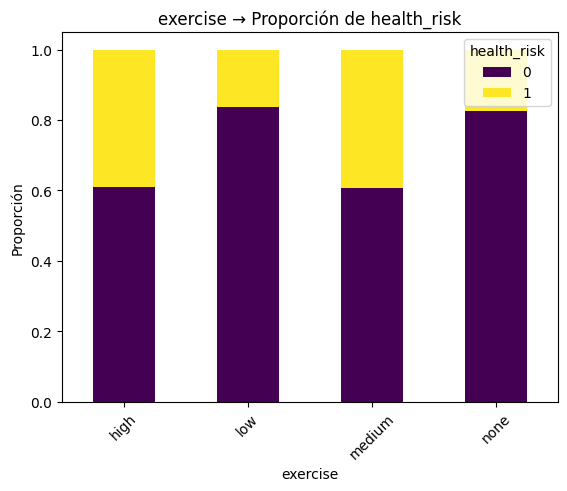


--- SUGAR_INTAKE vs health_risk ---
health_risk       0      1
sugar_intake              
high          0.841  0.159
low           0.666  0.334
medium        0.659  0.341


<Figure size 800x400 with 0 Axes>

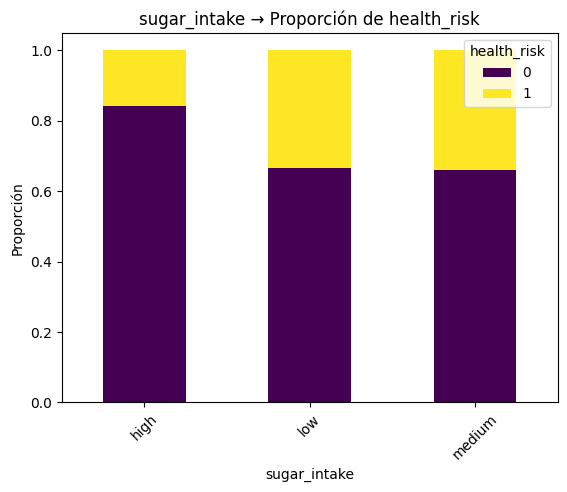


--- PROFESSION vs health_risk ---
health_risk        0      1
profession                 
artist         0.687  0.313
doctor         0.665  0.335
driver         0.724  0.276
engineer       0.709  0.291
farmer         0.692  0.308
office_worker  0.699  0.301
student        0.700  0.300
teacher        0.708  0.292


<Figure size 800x400 with 0 Axes>

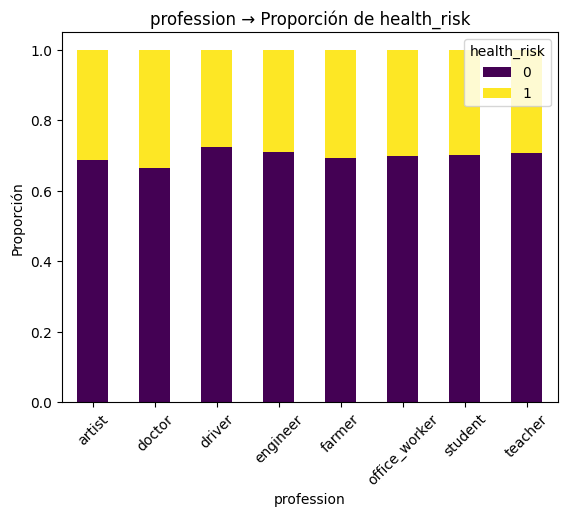

In [66]:

# 1. Heatmap de TODAS las variables numéricas/binarias
cols_to_check = ['age', 'weight', 'height', 'sleep', 'bmi', 
                 'smoking', 'alcohol', 'married', 'health_risk']

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_to_check].corr(), 
            annot=True, cmap='coolwarm', center=0, fmt='.3f', 
            square=True, linewidths=.5)
plt.title("Correlación con health_risk")
plt.show()

# 2. Análisis de variables categóricas
categorical_cols = ['exercise', 'sugar_intake', 'profession']

for col in categorical_cols:
    print(f"\n--- {col.upper()} vs health_risk ---")
    crosstab = pd.crosstab(df[col], df['health_risk'], normalize='index')
    print(crosstab.round(3))
    
    # Gráfico
    plt.figure(figsize=(8, 4))
    crosstab.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f"{col} → Proporción de health_risk")
    plt.ylabel("Proporción")
    plt.legend(title="health_risk")
    plt.xticks(rotation=45)
    plt.show()

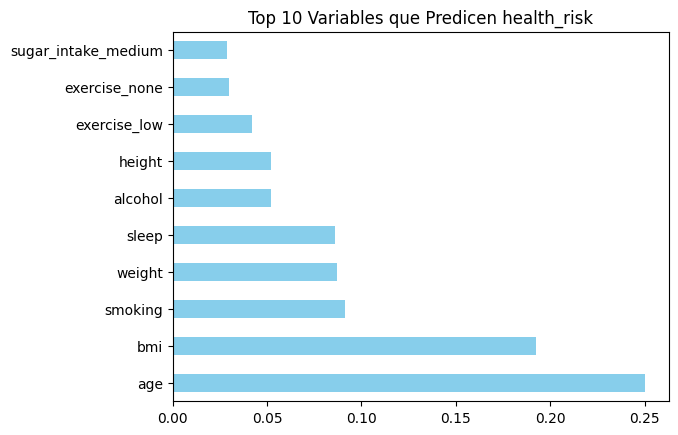

In [67]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('health_risk', axis=1)
y = df['health_risk']

# Convertir categóricas a numéricas
X_encoded = pd.get_dummies(X, drop_first=True)

model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Variables que Predicen health_risk")
plt.show()

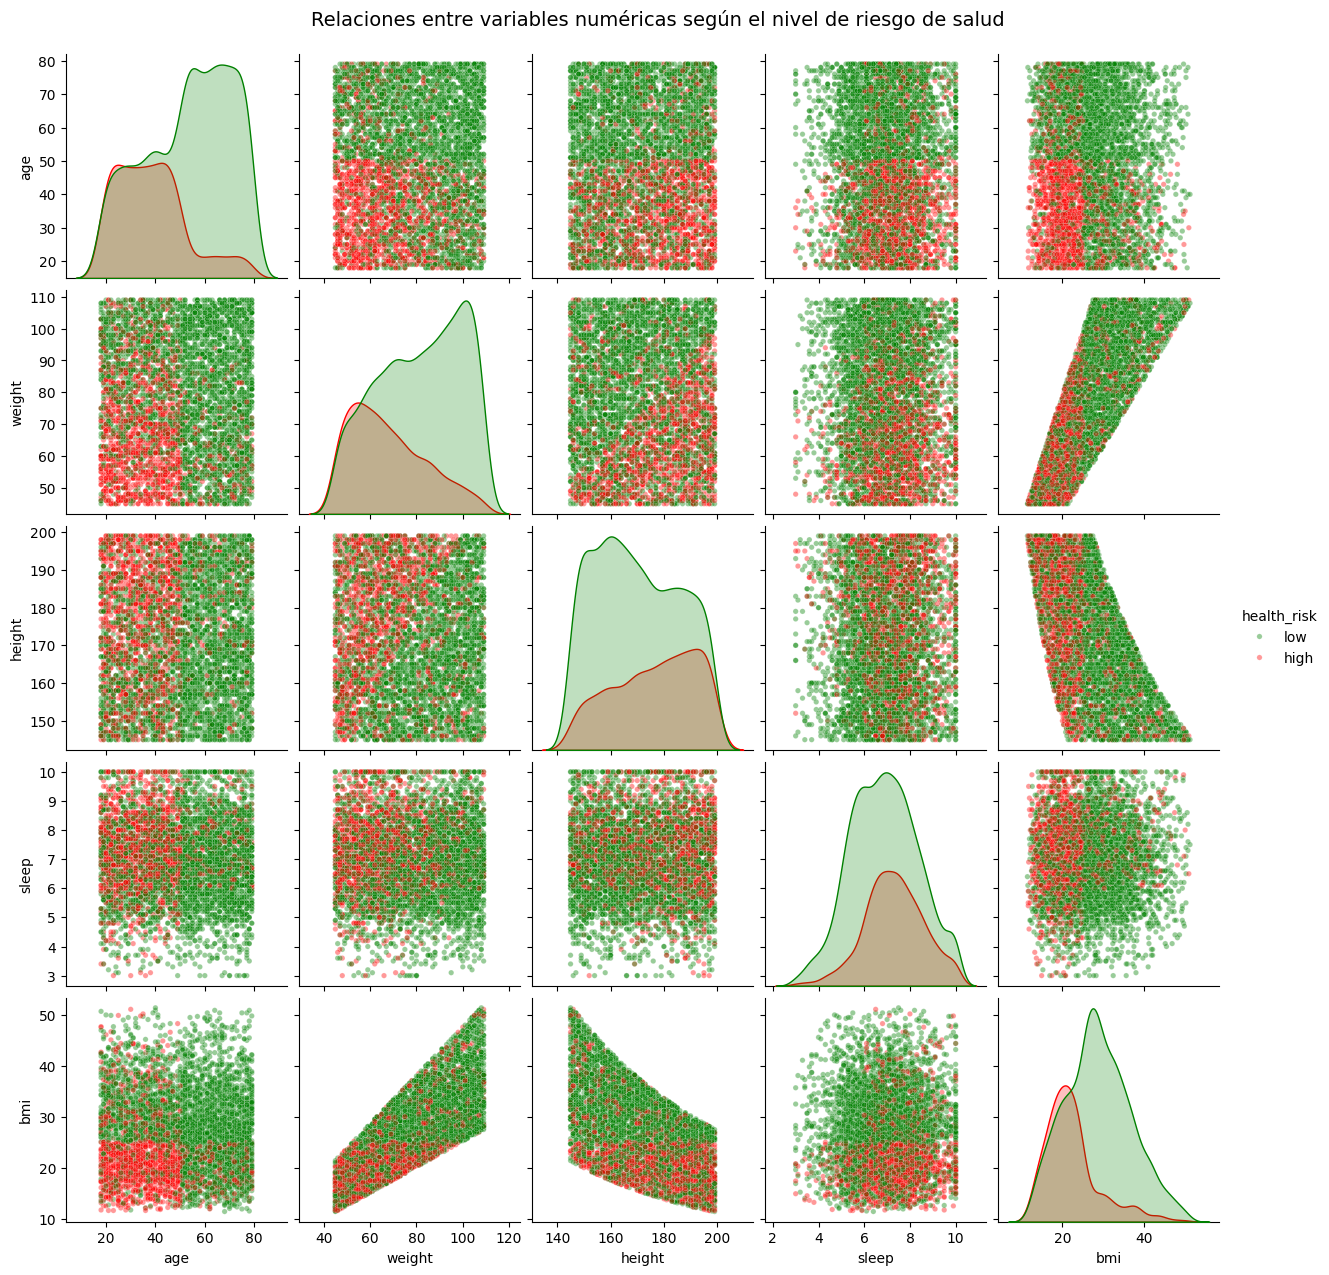

In [68]:
# Gráfico de dispersión pareado
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas continuas
cols_numericas = ['age', 'weight', 'height', 'sleep', 'bmi']

# Asegúrate de que 'health_risk' sea texto y no 0/1
df['health_risk'] = df['health_risk'].replace({0: 'low', 1: 'high'})

# Pairplot con color según el nivel de riesgo de salud
sns.pairplot(
    data=df,
    vars=cols_numericas,
    hue="health_risk",                      # Colorear por nivel de riesgo
    diag_kind="kde",
    palette={"low": "green", "high": "red"}, # Colores personalizados
    plot_kws={"alpha": 0.4, "s": 15}
)

plt.suptitle("Relaciones entre variables numéricas según el nivel de riesgo de salud", 
             y=1.02, fontsize=14)
plt.show()

In [69]:
# Clasificación binaria - Modelo de regresión logística
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Escalar variables numéricas
num_cols = ['age', 'weight', 'height', 'sleep', 'bmi']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Variables categóricas ordinales
ordinal_map = {
    'exercise': {'none': 0, 'low': 1, 'medium': 2, 'high': 3},
    'sugar_intake': {'low': 0, 'medium': 1, 'high': 2}
}
df.replace(ordinal_map, inplace=True)

# Convertir columnas categóricas y booleanas a numéricas
df['exercise'] = df['exercise'].astype(float)
df['sugar_intake'] = df['sugar_intake'].astype(float)
df['health_risk'] = df['health_risk'].replace({'low': 0, 'high': 1}).astype(int)

# Asegurar que las dummies booleanas sean enteros (0/1)
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# One-hot encoding variables nominales
df = pd.get_dummies(df, columns=['profession'], drop_first=True)

# ------------------------------
# 💡 Importante: Definir X e y después de procesar todo
# ------------------------------
X = df.drop('health_risk', axis=1)
y = df['health_risk']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8733333333333333

Matriz de confusión:
 [[962  85]
 [105 348]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1047
           1       0.80      0.77      0.79       453

    accuracy                           0.87      1500
   macro avg       0.85      0.84      0.85      1500
weighted avg       0.87      0.87      0.87      1500



/tmp/ipykernel_23131/2631712280.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(ordinal_map, inplace=True)
/tmp/ipykernel_23131/2631712280.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(ordinal_map, inplace=True)
/tmp/ipykernel_23131/2631712280.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

El modelo acierta en el 87 % de los casos al clasificar correctamente si una persona tiene riesgo de salud alto (1) o bajo (0).

962 verdaderos negativos (TN): personas con bajo riesgo correctamente identificadas.

348 verdaderos positivos (TP): personas con alto riesgo correctamente identificadas.

85 falsos positivos (FP): el modelo predijo “alto riesgo” cuando en realidad era bajo.

105 falsos negativos (FN): el modelo no detectó el riesgo alto.

Conclusión:
El modelo tiende un poco más a confundir casos de riesgo alto (FN = 105), lo cual es normal en datos de salud si la clase positiva es menos frecuente.
El modelo es más confiable para detectar personas sanas (bajo riesgo), pero aún pierde algunos casos de alto riesgo (recall = 0.77).

